# Lab 1, Maria Chernyavskaya, Section AB

## A little Statistics
### 1: Converting a probability into a 'sigma'. 
As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and standard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.

### Part A- Background info

The Probability Density Function of the Normal distribution, aka Gaussian, has the following form:

$$ h(x) = p(x \mid \mu,\sigma) = N(x|\mu,\sigma) \equiv \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

In plain English, this is the probability of x given $(\mu, \sigma)$. 

Features of a Normal Distribution include:
* looks like a bell (bell curve)
* mean = median = mode
* symmetry about the center, implying 50% of values less than the mean, and 50% greater than the mean
* area under the curve

The Gaussian looks like a bell curve:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm

In [2]:
mu=0
sigma=1
def example_gauss():
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    gauss = norm(mu, sigma).pdf(x)
    # actual plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axvline(mu, c='blue')
    ax.errorbar(mu, gauss.max() / 2., xerr=np.sqrt(2.*np.log(2.))*sigma, c='blue', capsize=4)
    plt.plot(x, gauss, ls='-', c='black', label=r'$\mu=%.1f,\ \sigma=%.1f$' % (mu, sigma))
    plt.hist(norm.rvs(mu,sigma, size = 100000), 50, density=True, color='orange')
    plt.ylim(0, gauss.max()*1.2)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Gaussian Distribution')
    plt.legend()
    plt.show()

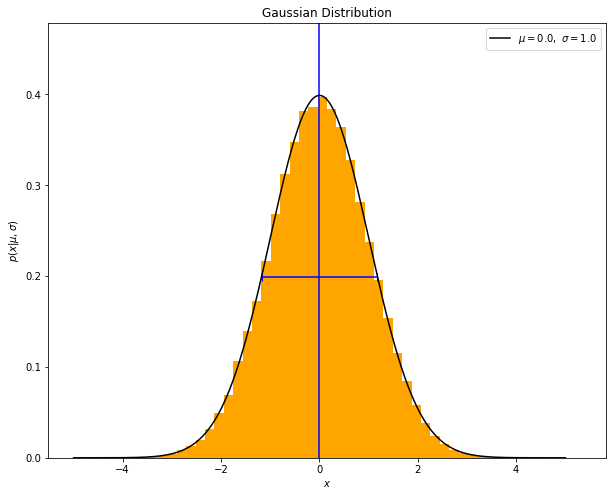

In [3]:
example_gauss()

As you can see, the mean, median and mode are at the same point (the peak), and there is symmetry to the graph. 

### Part B- Integration
Integrating the standard normal distribution is called the cumulative distribution function: 

$$\Phi(x') = \int_{-\infty}^{x'}  h(x)\,dx $$
$$\Phi(\infty) = 1.$$

and gives the probability that x will take a value less than x' (aka $x < x'$). It looks like this:

In [4]:
mu=0
sigma=1
h = norm(mu, sigma)
gauss_cdf = norm(mu, sigma).cdf

def plot_gauss_cdf():
    fig, ax = plt.subplots(figsize=(10, 8))
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    y = gauss_cdf(x)
    plt.plot(x, y, ls='-', c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
    plt.ylim(0, 1)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Cumulative Distribution Function for a Normal Distribution')
    plt.legend()
    plt.show()

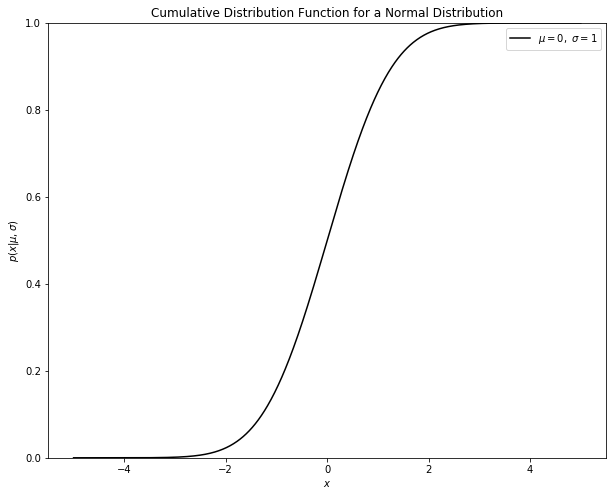

In [5]:
plot_gauss_cdf()

One useful tool realted to this is a z-table. A z-table is a mathematical table with values that correspond to the probability of an event. Essentially, the table relates a measurement (in units of $\sigma$) to probability.

To demonstrate this, let's integrate:

In [6]:
mu=0
sigma=1
h = norm(mu, sigma)

values = np.array([-2,-1,0,1,2])
prob = np.array([]).transpose()
z = np.array([]).transpose()

def Z(value, mu, sigma):
    return (value - mu)/sigma

for i in values:
    val = h.cdf(i)
    prob = np.append(prob, val)
    zboi = Z(i, mu, sigma)
    z = np.append(z, zboi)
table = pd.DataFrame({"Probability (percent)": prob * 100, r"X$\sigma$": z})
table

,Probability (percent),X$\sigma$
0,2.275013,-2.0
1,15.865525,-1.0
2,50.000000,0.0
3,84.134475,1.0
4,97.724987,2.0


In the above code block, I took values from -2 to 2, and integrated the function from negative infinity, up to that value. What I get in return is the probability of an event x falling in that range. Looking at this z-table: https://en.wikipedia.org/wiki/Standard_normal_table the values line up, as expected. Since I was using a "standard normal", with mu = 0 and sigma = 1, my z values are the same as the X in "X$\sigma$" events.

### Part C- Throw it in reverse
The integrating is cool and all, but usually, a probability is known, and we want to know the $\sigma$ value associated with that event. Essentially, we are working backwards to what I showed above. To demonstrate this, I will use the probabilities I got in the previous part:

In [7]:
values = np.array([])

for i in prob:
    val = h.ppf(i)
    values = np.append(values, val)    
print(f"Values: {values}")

Values: [-2. -1.  0.  1.  2.]


### Pseudo-part D, an addendum
Recall that the cdf is an integral from negative infinity to x, but when we are looking for an X$\sigma$ event, we want the integral *from* x to positive infinity. The point of the integration is to find the area under the pdf curve, which corresponds to probability (this is what cdf does). To go the other way, we use the ppf function. However, because the cdf and ppf functions integrate from negative infinity up to a given value, which is the inverse of what we are looking for. When negative signs appear, that means that the sigmas that we are counting are to the left of the mean, versus the right.

### 2: Now let's explore some other continuous analytic distributions. 
Following the pattern from the first HW assigment, I made both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time not the Gaussian. This time, I am using a Rayleigh distribution.

### Part A- Background
The Rayleigh distribution has the following functional form:

$$f(x,\sigma) = {\frac {x}{\sigma^{2}}}{\exp\left({\frac {-x^2} {2\sigma ^{2}}}\right)} \text { , for } {\displaystyle x\geq 0} $$

In simple English, this means that the Rayleigh distribution is continuous for nonnegative-valued variables. 

Features of a Rayleigh distribution include:
* looks like a skewed bell curve
* mode = $\sigma$
* mean = $\sigma {\sqrt {\frac {\pi }{2}}}$
* Median = $\sigma \sqrt {2 \ln{2}} $

Fun fact- It is a special case of a $\chi$ distribution with two degrees of freedom.

Its pdf is mathematically described as:

$$ F(x, \sigma) = 1 - \exp\left({\frac{-x^{2}} {2\sigma ^{2}}}\right) \text{ , for } {\displaystyle x\in [0,\infty )}$$

It can also be described as an integral, the same as for a Normal distribution.

### Part B- Plotting
The plots below demonstrate the text above via Rayleigh distributions with $\sigma$ = [0.5, 1, 2, 5].

In [8]:
sigmas= np.array([0.5, 1, 2, 5])

def example_rayleigh():
    for i in sigmas:
        x = np.linspace(0, 5*i, 100000)
        realization = stats.rayleigh.rvs(scale= i, size=100000)
        analytic = stats.rayleigh.pdf(x, scale=i)
        fig, ax = plt.subplots(figsize=(8, 6))
        plt.plot(x, analytic, ls='-', c='black', label=r'$\sigma=%.1f$' % (i))
        plt.hist(realization, 25, density=True, color='orange', edgecolor='black')
        plt.ylim(0, analytic.max()*1.2)
        plt.xlabel('$x$')
        plt.ylabel(r'$p(x|\sigma)$')
        plt.title('Rayleigh Distribution')
        plt.legend()
        plt.show()

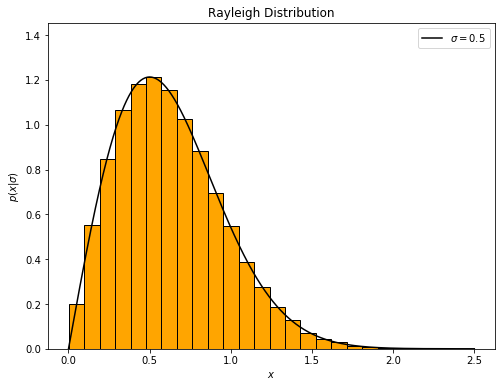

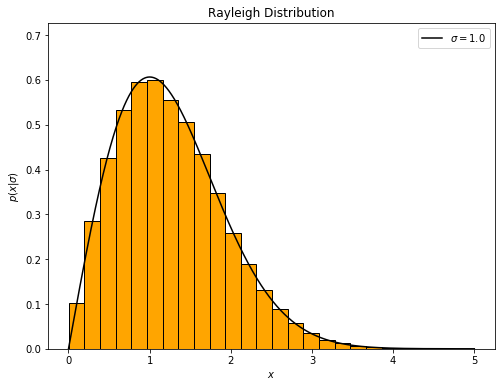

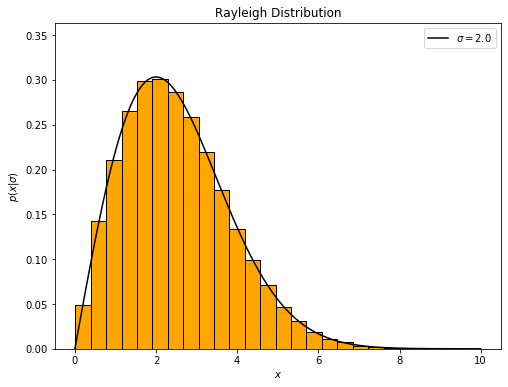

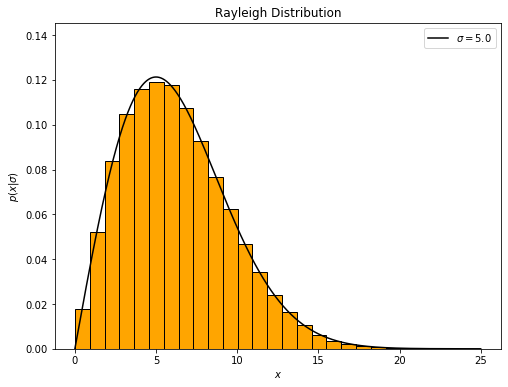

In [9]:
example_rayleigh()

### 3: Signal-free data
Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'. 

### Part A- Selecting a value

I have selected $x' = 15$, and I am using my last generated distribution (the $\sigma$ = 5 one).

### Part B- Stating the statistical question

The statistical question in my words is this:

What is the probability that in a set of signal-free data, the background generates a value x that is signal-like, or greater?

**From Prof. Morales:** *If there is no signal, and the signal-free data has a Gaussian distribution (Gaussian null-hypothesis); what is the probability that the data produces a signal that is equally or more signal-like than what I observed?*

### Part C- Question as a mathematic expression

$$ p(x = 15| \sigma = 5) = \int_{x}^{\infty}{f(x, \sigma)} dx = \int_{15}^{\infty}{\frac {x}{\sigma^{2}}}{\exp\left({\frac {-x^2} {2\sigma ^{2}}}\right)}dx  $$

### Part D- Calculations
Here are the calculations of the probability that the background produced the signal, and a visual for what I am looking for:

In [10]:
def my_rayleigh_logged():
    sigma = 5
    x = np.linspace(0, 5*sigma, 100000)
    realization = stats.rayleigh.rvs(scale= sigma, size=100000)
    analytic = stats.rayleigh.pdf(x, scale=sigma)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.semilogy(x, analytic, ls='-', c='black', linewidth = 3, label=r'$\sigma=%.1f$' % (sigma))
    plt.hist(realization, 50, density=True, edgecolor='black', alpha = 0.7)
    plt.vlines(15, 0, analytic.max()*1.2, ls = '--', linewidth = 3, color = 'green', label = 'measurement')
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\sigma)$')
    plt.title('Rayleigh Distribution, semi-logged')
    plt.legend()
    plt.show()
    return

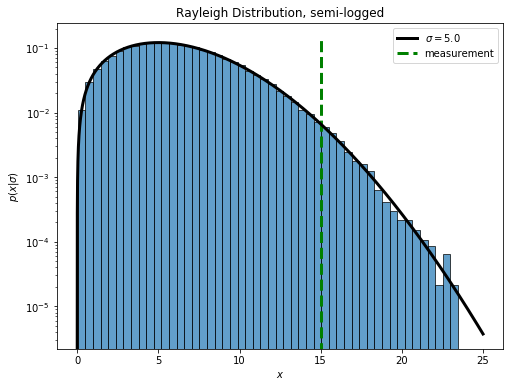

In [11]:
my_rayleigh_logged()

In [12]:
measurement = 15
sigma = 5
distribution = stats.rayleigh(scale = sigma)
cdfval = 1 - distribution.cdf(measurement) # cdf goes from -inf to value, need the other side
print(f"The probability of the background giving signal-like noise of value 15 or greater is {cdfval*100:.2f}%.")

The probability of the background giving signal-like noise of value 15 or greater is 1.11%.


### Part E- Equivalent $\sigma$
Convert your probability into an equivalent '$\sigma$':

This involves using stats.norm.ppf() because we are equating the probability of the event happening within the chosen distribution to the probability of it occuring associated with a normal distribution via the null hypothesis. We do this to express our probability as an X$\sigma$ event.

In [13]:
ppfval = stats.norm.ppf(1 - cdfval) # 1- cdfval enforces correct signage 
print(f"This is a {ppfval:.3f}σ event.")

This is a 2.287σ event.


Looking at our previously mentioned z-tables, this lines up.

### 4: Exploration time
Now explore a little bit. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. Discuss the patterns that you see.

I will use values above, below, and at the mean of the distribution to see what changes. In particular, I will be using measurements = [1, 5, 10, 24].

In [14]:
measurements = np.array([1,5,10,24])
distribution = stats.rayleigh(scale = sigma)
cdfvals = (1 - distribution.cdf(measurements)).transpose()
ppfvals = (stats.norm.ppf(1- cdfvals)).transpose()
table = pd.DataFrame({"Probability (percent)": cdfvals * 100, r"X$\sigma$": ppfvals})
table = table.rename(index={0: "1", 1: "5", 2: "10", 3: "24"})
table = table.rename_axis("measurements", axis="columns")
table

measurements,Probability (percent),X$\sigma$
1,98.019867,-2.057870
5,60.653066,-0.270288
10,13.533528,1.101520
24,0.000993,4.266470


Given the question that I was asking, which is probability of signal-like background noise being generated at a measurement value or higher, this makes sense. The larger the measurement value, the less likely the background is to generate that value. The z-scores for measurement values less than the mean are negative because they are located to the left of the mean, thus they are negative $\sigma$ values away from the mean. Everything checks out!

## Non-continuous distributions
In many physics contexts we are counting discrete events. We can detect 9 gamma-rays or 10 gamma-rays, but 9.2 gamma-rays makes no sense. In these contexts the continuous distributions make no sense and we instead must use discrete distributions. The two most common of these are the Binomial and the Poisson (which is a limiting case of the Binomial). I am working with Poisson.

### Part A- Background
Read up on the distributions

The Poisson distribution is popular for modeling the number of times an event occurs in an interval of time or space. It is a discrete distribution, meaning there is no "smooth" curve that defines it. The analytical equation is instead the probability mass function, and looks like this:


$${\displaystyle \!f(k|\lambda )=p(x=k|\lambda)={\frac {\lambda ^{k}e^{-\lambda }}{k!}}}$$

In this equation, $e$ is Euler's number, k is the number of events, and $\lambda$ is the rate of events. The last two parameters are best explained in an example:

Imagine the following phemonema:

* The number of meteorites striking the Earth in a year, with a diameter greater than 1 meter
* The number of undergraduate students taken on to do research under LSST faculty per academic year
* The number of photons hitting a detector in a particular time interval

These are all examples of events that can be modeled with a Poisson distribution! Let's take the meteorite example- $\lambda$ is how many meteorites of that size strike the Earth in a year. If we wanted to know the probability that 3 meteorites hit Earth in a given year, 3 would be our k. Important to note is that the events have to be independent: the meteorites don't influence each other to fall on Earth (mostly- let's ignore the gravitational interactions), and the photons don't talk to each other before hitting the detector.

### Part B- Plotting
Time to make plots, featuring different parameters and explanations!

In [15]:
def example_poisson():
    fig, ax = plt.subplots(figsize=(8, 6))
    fish1 = np.random.poisson(2, size=(100000))
    fish2 = np.random.poisson(5, size=(100000))
    fish3 = np.random.poisson(10, size=(100000))
    ax.hist(fish1, bins = 10, histtype='step', density= True, linewidth=3, color = 'blue', label =r'$\lambda$ = 2') 
    ax.hist(fish2, bins = 10, histtype='step', density= True, linewidth=3, color = 'orange', label =r'$\lambda$ = 5')
    ax.hist(fish3, bins = 10, histtype='step', density= True, linewidth=3, color = 'green', label =r'$\lambda$ = 5')
    plt.xlabel('$k$')
    plt.ylabel(r'$p(x = k|\lambda)$')
    plt.title('Poisson distribution')
    ax.legend(fontsize = 12)
    plt.show()
    
def poisson_logged():
    fig, ax = plt.subplots(figsize=(8, 6))
    fish1 = np.random.poisson(2, size=(100000))
    fish2 = np.random.poisson(5, size=(100000))
    fish3 = np.random.poisson(10, size=(100000))
    ax.hist(fish1, bins = 10, histtype='step', density= True, linewidth=3, color = 'blue', label =r'$\lambda$ = 2') 
    ax.hist(fish2, bins = 10, histtype='step', density= True, linewidth=3, color = 'orange', label =r'$\lambda$ = 5')
    ax.hist(fish3, bins = 10, histtype='step', density= True, linewidth=3, color = 'green', label =r'$\lambda$ = 5')
    plt.yscale('log')
    plt.xlabel('$k$')
    plt.ylabel(r'$p(x = k|\lambda)$')
    plt.title('Poisson distribution, logged')
    ax.legend(fontsize = 12)
    plt.show()

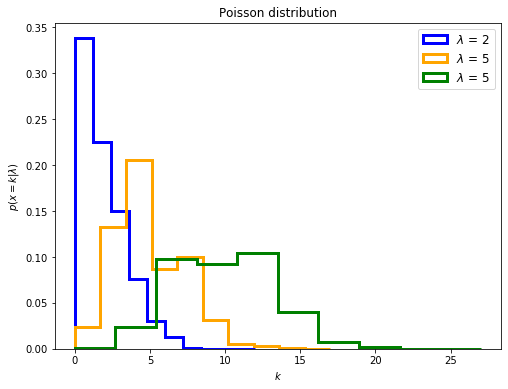

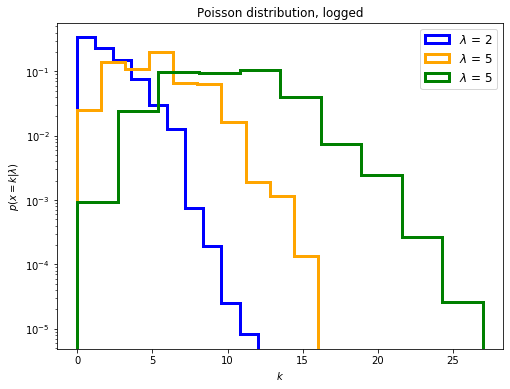

In [16]:
example_poisson()
poisson_logged()

The above plots are histograms only, because the distribution is not continuous and cannot have a smooth, parametrized curve. Both graphs are of Poisson distributions, with varying $\lambda$ parameters as discussed above. The bottom graph shows the same three distributions as the top one, except the y-axis has been logged.

### Part C- Questioning
Again, time to define a hypothetical question and calculate the corresponding probability. Here's the question:

What is the probability that a measurement shows up $k$ times in a fixed time or space interval $t$, given that the events are independent of each other and have expected rate of occurence $\lambda$?

Here's the math for a measurement showing up k times in a distribution of events happening at a rate of $\lambda$ = 1:

In [17]:
k = np.array([0, 1, 2, 3, 4, 5])
lamb = 1
cdfvals = ((stats.poisson.pmf(k, lamb))).transpose()
ppfvals = (stats.norm.ppf(1 - cdfvals)).transpose()
table = pd.DataFrame({"Probability (percent)": cdfvals * 100, r"X$\sigma$": ppfvals})
table = table.rename_axis("$k$", axis="columns")
table

$k$,Probability (percent),X$\sigma$
0,36.787944,0.337475
1,36.787944,0.337475
2,18.393972,0.900453
3,6.131324,1.543843
4,1.532831,2.161502
5,0.306566,2.740674


This lines up with the values on this Wiki article about Poisson distribution: https://en.wikipedia.org/wiki/Poisson_distribution

### Part D- Implications
Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.

The implications for experiments are that you are measuring "discrete" things, so maybe people, or instances of something occuring. Just like you can't have half a person or half an instance of something happening (I can't have 0.5 occurances of a flood- either none happened or one did). This means that the data may not line up exactly with what the statistics say.

### Part E- Pondering continuity
While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.

Thinking about this, it makes sense because you can get an average that is not discrete, even if all the values in the data are (math operations like division are continuous). So while my location and scale parameters can vary continuously because of mathematical operations, from a physical application standpoint I know I can't have half a person, the numbers just worked out that way. Rounding up or down (depends on application) solves this issue.